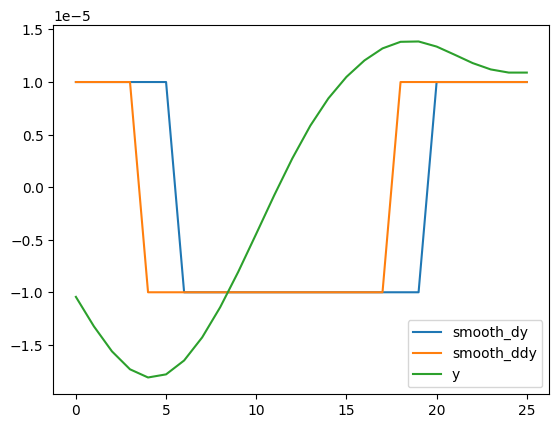

In [17]:
import json
import matplotlib.pyplot as plt
import numpy as np
from utils import smooth_ma
q = open("data_history.json")
f = json.load(q)
q.close()



y = smooth_ma(np.array(f['y'])[:30])



dy = np.array(f['dy'])[:30]
dy = smooth_ma(dy)
dy[dy<=0] = -0.00001
dy[dy>0] = 0.00001
plt.plot(dy[4:],label='smooth_dy')


ddy = np.array(f['ddy'])[:30]
ddy = smooth_ma(ddy)
ddy[ddy<=0] = -0.00001
ddy[ddy>0] = 0.00001
plt.plot(ddy[4:],label='smooth_ddy')


# dy = smooth_ma(np.array(f['dy'])[:30] * 20) 

ddy = np.array(f['ddy'])[:30]
# ddy = smooth_ma(np.array(f['ddy'])[:30]* 20)

# buy = f['bought'][1:10]
# tbuy = f['tbought'][1:10]
# sell = f['sold'][1:10]
# tsell = f['tsold'][1:10]


y -= y.mean()
y /= 10
plt.plot(y[4:],label='y')
# plt.plot((dy + y.mean())[8:15],label='dy')
# plt.plot((ddy + y.mean())[8:15],label='ddy')

# plt.plot(dy[4:],label='dy')
# plt.plot((ddy)[8:15],label='ddy')
# plt.scatter(tbuy,buy, label='buy')
# plt.scatter(tsell,sell, label='sell')
plt.legend()

In [19]:

%%time
from forex import *

# env = ForexApi()

# @time
q = deriv(y)
for i in range(1000):
    q= deriv(q)

CPU times: total: 15.6 ms
Wall time: 12.4 ms


In [ ]:
# Get path
desired_pair = "EUR_USD"
info = env.view(gen_info=True)['account']['balance']
info


{'guaranteedStopLossOrderMode': 'DISABLED',
 'hedgingEnabled': False,
 'id': '101-001-27337634-002',
 'createdTime': '1712165859.405719999',
 'currency': 'USD',
 'createdByUserID': 27337634,
 'alias': 'test',
 'marginRate': '0.02',
 'lastTransactionID': '2826',
 'balance': '918.7923',
 'openTradeCount': 2,
 'openPositionCount': 2,
 'pendingOrderCount': 2,
 'pl': '-102.6265',
 'resettablePL': '-102.6265',
 'resettablePLTime': '0',
 'financing': '-2.0312',
 'commission': '0.0000',
 'dividendAdjustment': '0',
 'guaranteedExecutionFees': '0.0000',
 'orders': [{'id': '2825',
   'createTime': '1735667949.765179447',
   'type': 'TAKE_PROFIT',
   'tradeID': '2824',
   'price': '0.79029',
   'timeInForce': 'GTC',
   'triggerCondition': 'DEFAULT',
   'state': 'PENDING'},
  {'id': '2826',
   'createTime': '1735667949.765179447',
   'type': 'STOP_LOSS',
   'tradeID': '2824',
   'price': '0.99029',
   'timeInForce': 'GTC',
   'triggerCondition': 'DEFAULT',
   'triggerMode': 'TOP_OF_BOOK',
   'state